# NAME: TEMITOPE OLUWASEYI ABISOLA


# STUDENT ID: 22540072

# DEPARTMENT: DEPARTMENT OF COMPUTING AND MATHEMATICS

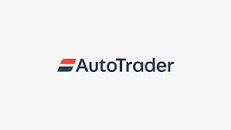

#Loading of the dataframe

In [1]:
# %config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='notebook')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")

In [2]:
#adverts_df is the Autotrader Car Adverts datasets

In [3]:
adverts_df = pd.read_csv("C:/Users/user/Downloads/adverts.csv")

In [4]:
#public_reference in my own view is the number of people that inquired about the car
#reg_code is the car registration for USED cars
#standard_model is a feature of the car in the model
#mileage is a feature of the total distance covered of the car before it was sold
#standard_make is a feature of the car.
#vechicle_condition is to let us know the difference between Used and New cars. we can also determine that the reg_code
#year_of_registration is the year the car was acquired and registered the old user...
#unfortunately the missing values in both the reg_code and the year_of_registration are not the same.
#body_type is the feature differentiating the size of the car.
#crossover_car_and_van by my understanding is a feature that show if a car can be converted into a van.
#fuel_type is the feature showing the type of fuel that powers the engine of the car.

In [5]:
adverts_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [6]:
adverts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


##To identify how many rows and columns in the dataframe

In [7]:
adverts_df.shape

(402005, 12)

In [8]:
adverts_df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [9]:
adverts_df.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

## Analysis Of Distributions

In [10]:
mileage = adverts_df['mileage'].values
year_of_registration = adverts_df['year_of_registration'].values
price = adverts_df['price'].values

##Using the variables to create histograms plot to visualize the distribution of the data.

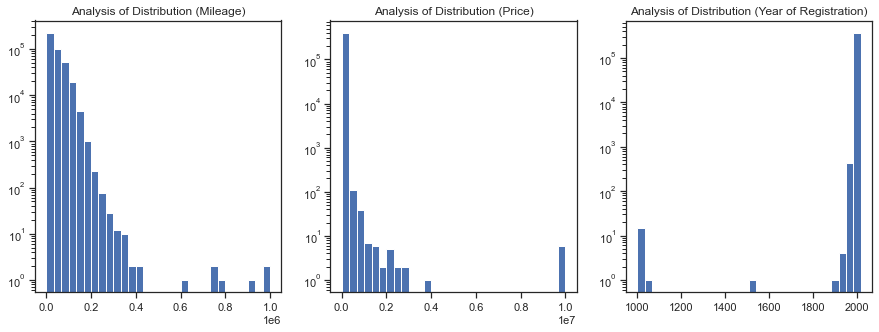

In [11]:
# Plot the histogram
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(mileage, bins=30)
ax[0].title.set_text('Analysis of Distribution (Mileage)')
ax[0].set_yscale('log')

ax[1].hist(price, bins=30)
ax[1].title.set_text('Analysis of Distribution (Price)')
ax[1].set_yscale('log')

ax[2].hist(year_of_registration, bins=30)
ax[2].title.set_text('Analysis of Distribution (Year of Registration)')
ax[2].set_yscale('log')

##Showing a histogram plot for 3 variables "Mileage","Price", "Year_of_registration"

## Identication/Commenting on Missing Values

In [12]:
adverts_df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

#counting and identification of missing values for each columns and decide whether or not to handle the missing data and how you want to handle it in the dataframe.

## Identication/Commenting on Outliers and Noise

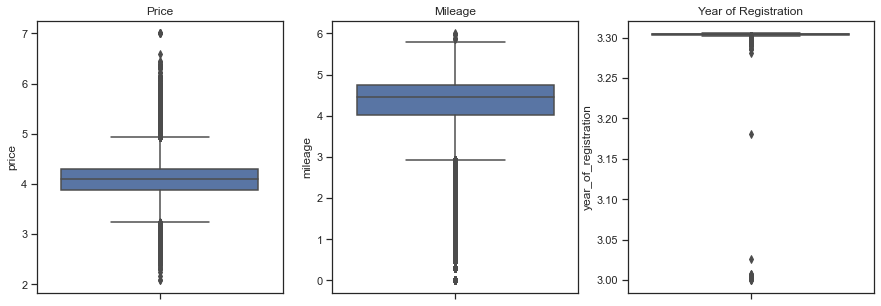

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(y=np.log10(adverts_df['price']),ax=ax[0])
ax[0].title.set_text('Price')

sns.boxplot(y=np.log10(adverts_df['mileage']),ax=ax[1])
ax[1].title.set_text('Mileage')

sns.boxplot(y=np.log10(adverts_df['year_of_registration']),ax=ax[2])
ax[2].title.set_text('Year of Registration')

# 2.DATA PROCESSING

### 2.1-  DEALING WITH MISSING VALUES, OUTLIERS AND NOISE

In [14]:
adverts_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


##To get a quick overview of the data while checking the first few rows to help identify any issues with the data such as missing values or incorrect data types.

In [15]:
adverts_df['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [16]:
# check for negative values
negative_values = adverts_df[adverts_df['mileage'] < 0]
if negative_values.empty:
    print("No negative values found.")
else:
    print("Negative values found.")


No negative values found.


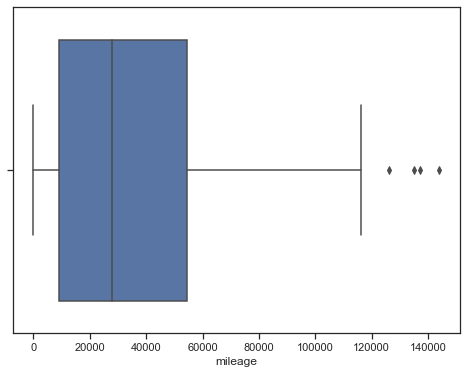

In [17]:
#Select a random sample of the data
sample =adverts_df.sample(n=100, random_state=42)

sns.set(style='ticks', color_codes=True)
sns.boxplot(data=sample, x='mileage')
plt.show()

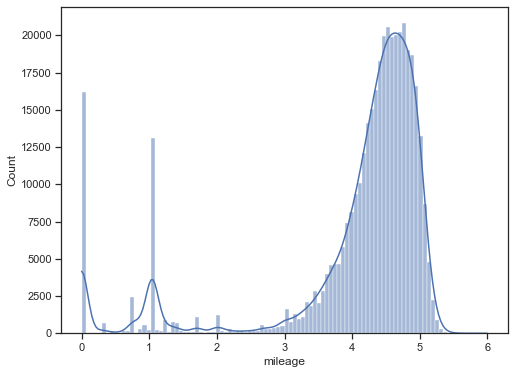

In [18]:
import seaborn as sns
import numpy as np


if 'mileage' in adverts_df.columns:
    # drop NaN values from the 'mileage' column
    adverts_df.dropna(subset=['mileage'], inplace=True)
    # Apply log10 to mileage and pass the result to histplot function
    sns.histplot(np.log10(adverts_df['mileage']+1), kde=True, bins=100)
else:
    print("The 'mileage' column does not exist in the DataFrame.")


In [19]:
adverts_df['mileage'] = adverts_df.groupby(['standard_make','standard_model'])['mileage'].apply(lambda x: x.fillna(x.mean()))

##The fillna() with the mean()function fillled the missing values in each group of 'standard_make' and 'standard_model' with the mean value of the non-missing values in the same group.
##The groupby() function groups the data by 'standard_make' and 'standard_model' values and applies the lambda function to all the groups.
##The main function of the code is to replace the previous 'mileage' column with a new one where the missing values are filled in with the mean values of the non-missing values of the same group.

In [20]:
adverts_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31844
standard_colour           5368
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33292
price                        0
body_type                  836
crossover_car_and_van        0
fuel_type                  600
dtype: int64

In [21]:
adverts_df['price'].describe()

count    4.018780e+05
mean     1.734081e+04
std      4.644190e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

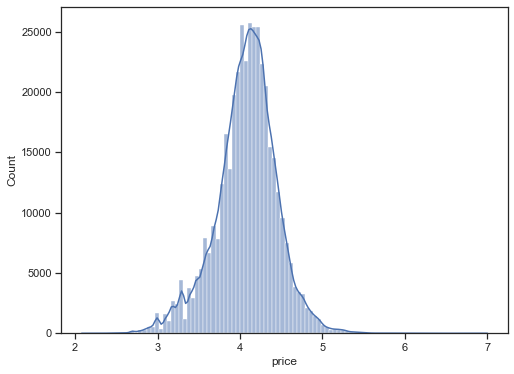

In [22]:
sns.histplot(np.log10(adverts_df['price']), kde=True, bins=100)

In [23]:
adverts_df['price'] = adverts_df.groupby(['standard_make','standard_model'])['price'].apply(lambda x: x.fillna(x.mean()))

In [24]:
adverts_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31844
standard_colour           5368
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33292
price                        0
body_type                  836
crossover_car_and_van        0
fuel_type                  600
dtype: int64

###TO REMOVE OUTLIERS IN THE DATASETS I WILL HAVE TO CALCULATE "EACH" COLUMN USING THE INTERQUATILE RANGE

# PRICE COLUMN

In [25]:
df1=adverts_df['price']

In [26]:
#TO CALCULATE THE IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1


#REMOVE OUTLIERS
adverts_df = adverts_df[(adverts_df['price'] > Q1 - 1.5 *IQR) & (adverts_df['price'] < Q3 + 1.5 *IQR)]


In [27]:
adverts_df['price'].describe()

count    375626.000000
mean      13464.075325
std        8332.866927
min         120.000000
25%        7000.000000
50%       11990.000000
75%       18210.750000
max       38755.000000
Name: price, dtype: float64

# MILEAGE

##Mileage has a lot of outliers, i will remove outliers using the same process i did for price column

In [28]:
df1=adverts_df['mileage']

In [29]:
#TO CALCULATE THE IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

#REMOVE OUTLIERS
adverts_df = adverts_df[(adverts_df['mileage'] > Q1 - 1.5 *IQR) & (adverts_df['mileage'] < Q3 + 1.5 *IQR)]


In [30]:
adverts_df['mileage'].describe()

count    368172.000000
mean      37416.856314
std       31052.339558
min           0.000000
25%       12300.000000
50%       30000.000000
75%       57000.000000
max      128810.000000
Name: mileage, dtype: float64

# Year Of Registration

In [31]:
adverts_df['year_of_registration'].unique()


array([2011., 2017., 2016., 2015., 2013., 2008., 2010., 2019.,   nan,
       2012., 2018., 2009., 2014., 2003., 2006., 2020., 2005., 2002.,
       2000., 2007., 2004., 2001., 1986., 1998., 1993., 1999., 1994.,
       1990., 1995., 1997., 1969., 1984., 1991., 1992., 1988., 1987.,
       1989., 1996., 1980., 1967., 1972., 1968., 1970., 1979., 1933.,
       1981., 1985., 1978., 1971., 1973., 1974., 1966., 1982., 1977.,
       1983., 1965., 1976., 1007., 1957., 1515., 1063., 1975., 1964.,
       1955., 1009., 1962., 1016., 1909., 1963., 1934., 1958., 1961.,
       1010., 1950., 1008.,  999., 1956., 1954., 1960., 1017., 1952.,
       1959., 1006., 1015.])

##Checking of the unique values in the 'year_of_registration' column.

##LOADING A SPECIFIED FILE AND CREATE A NEW DATAFRAME OBJECT FOR EASY MANIPULATION OF THE DATA

In [32]:
age_identifier_df = pd.read_csv('C:/Users/user/Downloads/Age_identifier_codes.xls')
age_identifier_df.head(5)

,Year,1 March – 31 August,1 September – 28/29 February
0,2001/02,Y,51
1,2002/03,02,52
2,2003/04,03,53
3,2004/05,04,54
4,2005/06,05,55


In [33]:
('Age_identifier_codes.xls')

'Age_identifier_codes.xls'

In [34]:
# Split the year column to get the years before the "/" and assign it back to the year column
age_identifier_df['Year'] = age_identifier_df['Year'].str.split('/',expand=True)[0]
age_identifier_df.head(5)

,Year,1 March – 31 August,1 September – 28/29 February
0,2001,Y,51
1,2002,02,52
2,2003,03,53
3,2004,04,54
4,2005,05,55


##Converting the values in ['1 September – 28/29 February'] column of the new dataframe imported to string using the apply() and the str() function.

In [35]:
age_identifier_df['1 September – 28/29 February'] = age_identifier_df['1 September – 28/29 February'].apply(str)


In [36]:
year_identifier_df = pd.read_csv('C:/Users/user/Downloads/Year_identifier_codes.xls')
year_identifier_df.head(5)

,Letter,Dates of issue
0,A,February 1963
1,B,1 January 1964 – 31 December 1964
2,C,1 January 1965 – 31 December 1965
3,D,1 January 1966 – 31 December 1966
4,E,1 January 1967 – 31 July 1967


In [37]:
year_identifier_df['Year'] = year_identifier_df['Dates of issue'].str.split(' ', expand=True)[2]
year_identifier_df['Year'][0] = 1963

##Extract the year from the 'Dates of issue' column and create a new column 'Year' with these values

In [38]:
year_identifier_df.head()

,Letter,Dates of issue,Year
0,A,February 1963,1963
1,B,1 January 1964 – 31 December 1964,1964
2,C,1 January 1965 – 31 December 1965,1965
3,D,1 January 1966 – 31 December 1966,1966
4,E,1 January 1967 – 31 July 1967,1967


In [39]:
first_col = dict(zip(age_identifier_df['1 March – 31 August'], age_identifier_df['Year']))
second_col = dict(zip(age_identifier_df['1 September – 28/29 February'], age_identifier_df['Year']))

#Creating of two dictionaries, 'first_col' and 'second_col', from the data in the dataframe.
#The 'zip()' function was used to combine the elements of two iterables.

In [40]:
first_col, second_col

({'Y': '2001',
  '02': '2002',
  '03': '2003',
  '04': '2004',
  '05': '2005',
  '06': '2006',
  '07': '2007',
  '08': '2008',
  '09': '2009',
  '10': '2010',
  '11': '2011',
  '12': '2012',
  '13': '2013',
  '14': '2014',
  '15': '2015',
  '16': '2016',
  '17': '2017',
  '18': '2018',
  '19': '2019',
  '20': '2020',
  '21': '2021',
  '22': '2022',
  '23': '2023',
  '24': '2024',
  '25': '2025',
  '26': '2026',
  '27': '2027',
  '28': '2028',
  '29': '2029',
  '30': '2030',
  '31': '2031',
  '32': '2032',
  '33': '2033',
  '34': '2034',
  '35': '2035',
  '36': '2036',
  '37': '2037',
  '38': '2038',
  '39': '2039',
  '40': '2040',
  '41': '2041',
  '42': '2042',
  '43': '2043',
  '44': '2044',
  '45': '2045',
  '46': '2046',
  '47': '2047',
  '48': '2048',
  '49': '2049',
  '50': '2050'},
 {'51': '2001',
  '52': '2002',
  '53': '2003',
  '54': '2004',
  '55': '2005',
  '56': '2006',
  '57': '2007',
  '58': '2008',
  '59': '2009',
  '60': '2010',
  '61': '2011',
  '62': '2012',
  '63': 

In [41]:
def fill_year_of_registration(adverts_df):
    adverts_df['year_of_registration'] = adverts_df['year_of_registration'].fillna(adverts_df['reg_code'].astype(str).map(first_col))
    adverts_df['year_of_registration'] = adverts_df['year_of_registration'].fillna(adverts_df['reg_code'].astype(str).map(second_col))

fill_year_of_registration(adverts_df)


#The function above explains the filling of missing values in the 'year_of_registration' column.
#The function maps 'reg_code' to 'year_of_registration' by using 'first_col' and 'second_col' and subsequently fills the missing values of 'year_of_registration' column in the DataFrame using the 'fillna()' method.

In [42]:
adverts_df['year_of_registration'].isnull().sum()

23200

In [43]:
adverts_df[adverts_df['year_of_registration'].isnull()]['vehicle_condition'].value_counts()

NEW     22946
USED      254
Name: vehicle_condition, dtype: int64

It fills the missing data in year_of_registration in the 'adverts_df' dataframe using data from the column 'reg_code' and then, it counts the missing values in year_of_registration and 'vehicle_condition' column. 

In [44]:
adverts_df[adverts_df['year_of_registration'].isnull()]['vehicle_condition'].unique()


array(['NEW', 'USED'], dtype=object)

Checking the unique values of the 'vehicle_condition' column for the rows where the 'year_of_registration' column has missing values in the datadrame.

In [45]:
 adverts_df[adverts_df['vehicle_condition']=='USED']['year_of_registration'].mode()


0    2017.0
dtype: object

#Filling the missing values in the year_of_registration with the year 2017 

In [46]:
adverts_df.loc[(adverts_df['year_of_registration'].isnull()) & (adverts_df['reg_code'].isnull()), 'year_of_registration'] = 2017

In [47]:
adverts_df[adverts_df['year_of_registration'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
10044,202003098187902,73330.0,B,Gold,Jaguar,Mark II,USED,NaN,24990,Saloon,False,Petrol
16619,202010165086036,34000.0,P,Orange,Volkswagen,Campervan,USED,NaN,12500,Camper,False,Petrol
28307,202003218665171,55400.0,E,White,Renault,GTA,USED,NaN,12495,Coupe,False,Petrol
50188,202009304378374,24500.0,R,Blue,Mazda,Mazda3,USED,NaN,13495,Hatchback,False,Petrol
50961,202010215260465,49000.0,L,Blue,Chevrolet,SSR,USED,NaN,21500,Pickup,False,Bi Fuel
80899,202010014455127,2000.0,CA,Green,Caterham,Seven,USED,NaN,21995,Convertible,False,Petrol
85202,202009234126186,99123.0,B,Green,Land Rover,Series III,USED,NaN,12000,Pickup,True,Petrol
95640,202010215267071,55389.0,E,Grey,Mercedes-Benz,E Class,USED,NaN,25990,Coupe,False,Diesel
121673,202010315654601,76066.0,L,Red,BMW,3 Series,USED,NaN,8990,Convertible,False,Petrol
147774,202011015662169,49500.0,J,Silver,Mercedes-Benz,CL,USED,NaN,11995,Coupe,False,Petrol


##Filling of letters in the reg codes coLumn

In [48]:
year_dict = dict(zip(year_identifier_df['Letter'], year_identifier_df['Year']))

In [49]:
adverts_df['year_of_registration'].isnull().sum()

24

In [50]:
adverts_df = adverts_df[adverts_df['year_of_registration'].notnull()]

In [51]:
adverts_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 23377
standard_colour           4319
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  685
crossover_car_and_van        0
fuel_type                  447
dtype: int64

#Using the mode of standard colour to fill in the missing values.

In [52]:
adverts_df['standard_colour'] = adverts_df['standard_colour'].fillna(adverts_df['standard_colour'].mode()[0])

In [53]:
adverts_df['standard_colour'].isnull().sum()

0

In [54]:
adverts_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 23377
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  685
crossover_car_and_van        0
fuel_type                  447
dtype: int64

#Calculate the overall mode of the "body-type" column

In [55]:
mode = adverts_df['body_type'].mode()[0]

In [56]:
print(mode)

Hatchback


#Using the 'fillna()' method to fill the missing values in the 'body_type' column


In [57]:
adverts_df['body_type'] = adverts_df['body_type'].fillna(mode)

Using this code it will fill in the missing values in the body_type column with the overall mode of the body_type

In [58]:
adverts_df.isna().sum()

public_reference             0
mileage                      0
reg_code                 23377
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                  447
dtype: int64

In [59]:
adverts_df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Diesel Hybrid', 'Petrol Plug-in Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel'], dtype=object)

#Used to get all distinct values present in the column 'fuel_type' of dataframe

#The fueltype of the cars in the datasets are unique. So filling the missing values with the mode and median function is not the best. Therefore; i will be dropping all the missing values in this feature. 

#I noticed the "noise" in the year_of_registration data and i replaced it with the actual value that should be there.

In [60]:
adverts_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 23377
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                  447
dtype: int64

#At this stage, i am dropping all the missing values in my datasets.

In [61]:
adverts_df=adverts_df.dropna()

#It removes all the rows containing missing values from the Dataframe.

In [62]:
adverts_df.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol


In [63]:
adverts_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [64]:
adverts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344407 entries, 1 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       344407 non-null  int64  
 1   mileage                344407 non-null  float64
 2   reg_code               344407 non-null  object 
 3   standard_colour        344407 non-null  object 
 4   standard_make          344407 non-null  object 
 5   standard_model         344407 non-null  object 
 6   vehicle_condition      344407 non-null  object 
 7   year_of_registration   344407 non-null  object 
 8   price                  344407 non-null  int64  
 9   body_type              344407 non-null  object 
 10  crossover_car_and_van  344407 non-null  bool   
 11  fuel_type              344407 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 31.9+ MB


# FEATURE ENGINEERING AND DATA TRANSFORMATION

#For this aspect, i created a new feature to determine the age of each cars. I did this by subtracting the present year (2022) from each year of registration.

In [65]:
import datetime

# Get the current date
now = datetime.datetime.now()

# Convert the 'year_of_registration' column to numeric
adverts_df['year_of_registration'] = pd.to_numeric(adverts_df['year_of_registration'])

# Calculate the age of each car
adverts_df['age_of_car'] = now.year - adverts_df['year_of_registration']



In [66]:
adverts_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,age_of_car
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,12.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,6.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,7.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,8.0
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol,6.0


#The next stage is getting rid of irrelevant features

#'reg_code' and  'crossover_car_and_van'colums will be dropped from the dataframe using the drop method.

In [67]:
adverts_df = adverts_df.drop(columns=['reg_code',  'crossover_car_and_van'])

In [68]:
adverts_df.head()

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,age_of_car
1,202007020778260,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel,12.0
2,202007020778474,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol,6.0
3,202007080986776,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel,7.0
4,202007161321269,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel,8.0
5,202009304412074,16000.0,Blue,Audi,S5,USED,2017.0,29000,Convertible,Petrol,6.0


#SUBSETTING

#Subsetting is used to remove unnecessary columns, duplicate rows, or rows with missing data.

#To do the subsetting on my datasets, i splitted the datasets into bits.

 -Separated the numeric data from the dataframe.

In [69]:
DF= adverts_df.select_dtypes(['float64', 'int64'])

In [70]:
DF.head(10)

,public_reference,mileage,year_of_registration,price,age_of_car
1,202007020778260,108230.0,2011.0,7000,12.0
2,202007020778474,7800.0,2017.0,14000,6.0
3,202007080986776,45000.0,2016.0,7995,7.0
4,202007161321269,64000.0,2015.0,26995,8.0
5,202009304412074,16000.0,2017.0,29000,6.0
6,202007080998445,24075.0,2017.0,5861,6.0
7,202009244143980,99000.0,2013.0,24475,10.0
8,202010014442611,111236.0,2008.0,6995,15.0
10,202007151278313,77000.0,2010.0,4499,13.0
11,202007161303602,24487.0,2017.0,8795,6.0


#Select 5% of the rows randomly


In [71]:
DF1= adverts_df.sample(frac=0.05)

In [72]:
DF1

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,age_of_car
387233,202009294338082,77000.0,Red,MINI,Hatch,USED,2008.0,8000,Hatchback,Petrol,15.0
86779,202010275500004,61352.0,Red,Peugeot,107,USED,2011.0,2595,Hatchback,Petrol,12.0
255734,202010245373131,32068.0,Blue,Volkswagen,Polo,USED,2016.0,9000,Hatchback,Petrol,7.0
30006,202009153741458,49069.0,Red,Nissan,Juke,USED,2017.0,9500,SUV,Diesel,6.0
154615,202010124920644,10.0,Black,Suzuki,Swift,USED,2020.0,9995,Hatchback,Petrol Hybrid,3.0
...,...,...,...,...,...,...,...,...,...,...,...
164088,202006280617810,122000.0,Red,Renault,Megane,USED,2005.0,795,Hatchback,Petrol,18.0
121694,202005149313218,98500.0,Silver,Kia,Sedona,USED,2011.0,4995,MPV,Diesel,12.0
193597,202010245391793,25500.0,White,Vauxhall,Astra,USED,2016.0,8695,Hatchback,Diesel,7.0
374756,202001246515424,7500.0,Black,Hyundai,i10,USED,2020.0,10295,Hatchback,Petrol,3.0


In [73]:
if adverts_df.isnull().any().any():
    print('There are still missing values in the DataFrame.')
else:
    print('There are no missing values in the DataFrame.')


There are no missing values in the DataFrame.


# 3. ASSOCIATION AND GROUP DIFFERENCES ANALYSIS

3.1##QUANTITATIVE - QUANTITATIVE

In [74]:
DF1 = adverts_df

In [75]:
corr = DF1.corr()
corr

,public_reference,mileage,year_of_registration,price,age_of_car
public_reference,1.000000,0.023079,0.009841,-0.049510,-0.009841
mileage,0.023079,1.000000,-0.368922,-0.517220,0.368922
year_of_registration,0.009841,-0.368922,1.000000,0.288446,-1.000000
price,-0.049510,-0.517220,0.288446,1.000000,-0.288446
age_of_car,-0.009841,0.368922,-1.000000,-0.288446,1.000000


<AxesSubplot:>

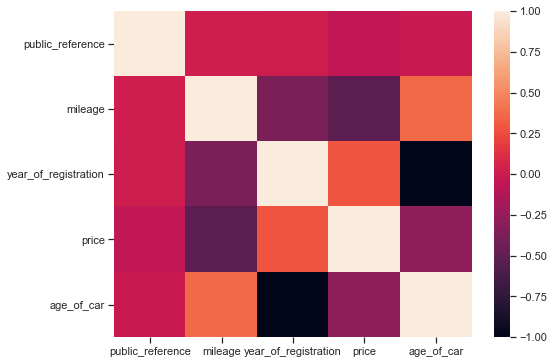

In [76]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
            

##Prepare The Data For Modelling

In [77]:
x = adverts_df[['mileage', 'age_of_car']]  
y = adverts_df['price']  


In [78]:
import statsmodels.api as sm

#prepare data for modeling
X = adverts_df[['mileage', 'age_of_car']]
X = pd.get_dummies(X, drop_first = True) 
y = adverts_df['price']

#Add a constant term to the indpendent variables
X = sm.add_constant(X)

#Fit the linear regresssion model
model = sm.OLS(y, X).fit()

#Print the summary statistics 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                 6.649e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        08:43:17   Log-Likelihood:            -3.5253e+06
No. Observations:              344407   AIC:                         7.051e+06
Df Residuals:                  344404   BIC:                         7.051e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.886e+04     20.047    940.611      0.0

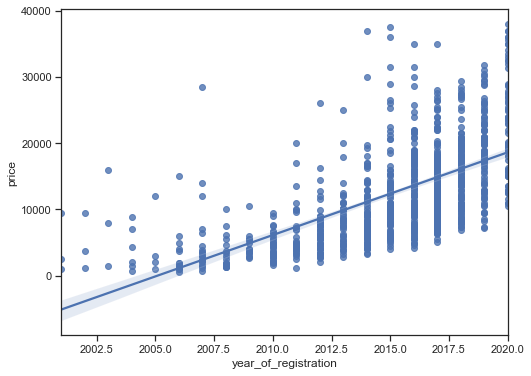

In [79]:
#Select a random sample of the data
sample = adverts_df.sample(n=1000, random_state=42)

#Create scatter plot with fitted line
sns.regplot(data=sample, x='year_of_registration', y='price')

#show plot
plt.show()

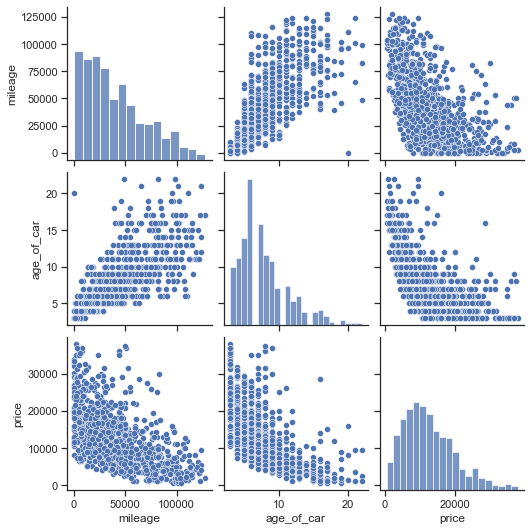

In [80]:
#Select a random sample of the data
sample = adverts_df.sample(n=1000, random_state=42)

#Set style and color palette
sns.set(style='ticks', color_codes=True)

#Select quantitative variables
quant_vars =['mileage', 'age_of_car', 'price']

#Create Scatter plot matrix sns.pairplot
sns.pairplot(data=sample, x_vars=quant_vars, y_vars=quant_vars)

#Show plot
plt.show()


# Quantitative --Categorical

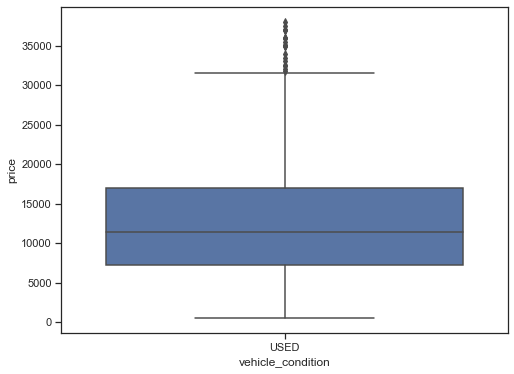

In [81]:
#Select a random sample of the data 
sample=adverts_df.sample(n=1000, random_state=42)

#Set style and color palette
sns.set(style='ticks', color_codes=True)

#Plot boxplot of the price variable for the two groups
sns.boxplot(data=sample, x='vehicle_condition', y='price')

#show plot
plt.show()

# Categorical-Categorical

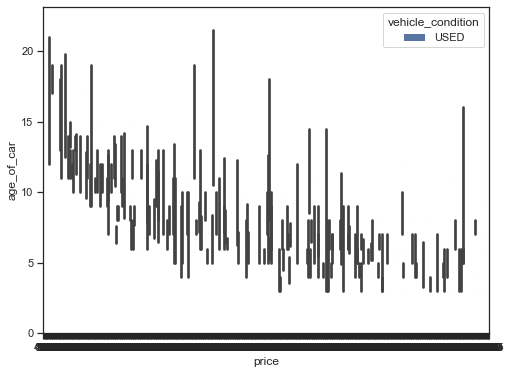

In [82]:
#Select a random sample of the data sample = adverts_df.sample(n=1000, random_state 42)

#Set style and color palette
sns.set(style='ticks', color_codes=True)

#Create a barplot of the mean price for the different groups
sns.barplot(data=sample, x='price', y='age_of_car', hue='vehicle_condition')

#Show plot
plt.show()
